# Проект: Принятие решений в бизнесе

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 


**Проект будет состоять из двух частей.**

**Первая часть:** Приоритизация гипотез. 9 гипотез по увеличению выручки интернет-магазина.

**Вторая часть:** Проанализировать A/B-тест

### Предобработка и изучение имеющихся данных

In [1]:
#загрузка библиотек
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display (hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Видим, что с типом данных проблем нет, не нуливых значений так же нет. Единственное что сделаем - приведем наименование столбцов к нижнему регистру для облегчения работы в дальнешем. 

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
display (hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Вывод:** 
Мы  загрузили библиотеки длядальнешей работы и открытили файл с гепотизами. Привели наименование столбцов в нижнему регистру для удобства в работе.

Так как в датасете всего 9 строчек, проводить проверку на дубликаты нет смысла, и так видно что одинаковых строчек нет.

### Первая часть: Приоритизация гипотез.

Напомню что, в моем распоряжении файл с 9 гипотезами, для которых оценены значения Reach, Impact, Confidence и Efforts. Применим к этим оценкам фреймворки ICE и RICE.

#### Применяем ICE

In [6]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']/ hypothesis['efforts']).round(2)
hypothesis.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


#### Применяем RICE

In [7]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/ hypothesis['efforts']).round(2)
hypothesis.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


#### Разница между фреймворками ICE и RICE.

Фреймворк RICE, в отличии от ICE, использует так же в качестве параметра охват количества пользователей, которых затронет предполагаемое изменение.

Наиболее перспективные гепотезы по методу ICE являются гепотезы с индексом 8, 0, 7. 

По методу RICE гепотезы с индексом 7, 2, 0.


При обоих методах в лидерах гипотезы 7 и 0 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".


### Вторая часть: Проанализировать A/B-тест

У нас есть результаты проведения А/В-теста. Проанализируем их. 

Сначала откроем файл с данными о заказах.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
display (orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Видим что тип данных в колонке "дата" - object, а нам необходи datetime

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
#Проверим на пропуски 
display(orders.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
#Проверим на дубликаты
orders.duplicated().sum()

0

In [13]:
#посмотрим уникальных пользователей по группам
i = list(set(orders.query('group == \"A\"')['visitorId'].unique()) & set(orders.query('group == \"B\"')['visitorId'].unique()))
len(i)

58

In [14]:
len(i) / orders.query('group == \"A\"')['visitorId'].nunique() * 100

11.530815109343937

58 пользователей оказались в обеих группах, это почти 12% от общегочисла пользователей группы А. 

In [15]:
len(i) / orders.query('group == \"B\"')['visitorId'].nunique() * 100

9.897610921501707

Аналогичная ситуация и с группой Б, это 10% пользователей.

In [16]:
orders.query('visitorId in @i')['visitorId'].count() / orders['visitorId'].count() * 100

15.121136173767752

Около 15% записей о покупках этих пользователей. Если мы удалим этих пользователей, то данные о среднем чеке будут более корректными, но это может повлиять на конверсию. Предлагаю оставить этих пользователей с поправкой о том, что данные не совсем корректны и 58 пользователей определены в обе группы.

Теперь откроем файл с посещениями.

In [17]:
visitors = pd.read_csv('/datasets/visitors.csv')
display (visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Так же видим проблему с типом данных в колонке "дата". Исправляем.

In [19]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

В этой таблице не существует информации об идентификаторах пользователя, поэтому не сможем исключить данные о посещении сайта.

In [20]:
#проверяем пропуски
display(visitors.isna().sum())

date        0
group       0
visitors    0
dtype: int64

In [21]:
#проверяем дубликаты
visitors.duplicated().sum()

0

**Вывод:** провели предобработку данных orders и visitors.
Нашли что 58 пользователей оказались в обеих группах, что состовляет 12% от общегочисла пользователей группы А и 10% пользователей группы Б. Так как процент большой, приняли решение не удалять их, а просто указать что данные будут не совсем корректные.

#### Построим график кумулятивной выручки по группам. 

Создадим таблицу кумулятивной выручки по дням по группам.

In [22]:
# таблица уникальных соцетаний дата - группа
datesGroups = orders[['date', 'group']].drop_duplicates()

In [23]:
# создание таблицы с кумулятивными значениями пользователей, заказов и стоимости заказов
ordersAggregated = (
    datesGroups.apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                        orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group': 'max', 
          'transactionId': 'nunique', 
          'visitorId': 'nunique', 
          'revenue': 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

In [24]:
# создание таблицы с кумулятивными значениями посещений
visitorsAggregated = (
    datesGroups.apply(
        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                          visitors['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])       
)

In [25]:
# объединяем таблицы по дате и группе
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Таблица готова. Теперь можно разбить её по группам и построим график кумулятивной выручки по дням.

In [26]:
# создаем отдельные таблицы для А и В
cumulativeRevenueA = cumulativeData.query('group == \"A\"')[['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group == \"B\"')[['date','revenue', 'orders']]

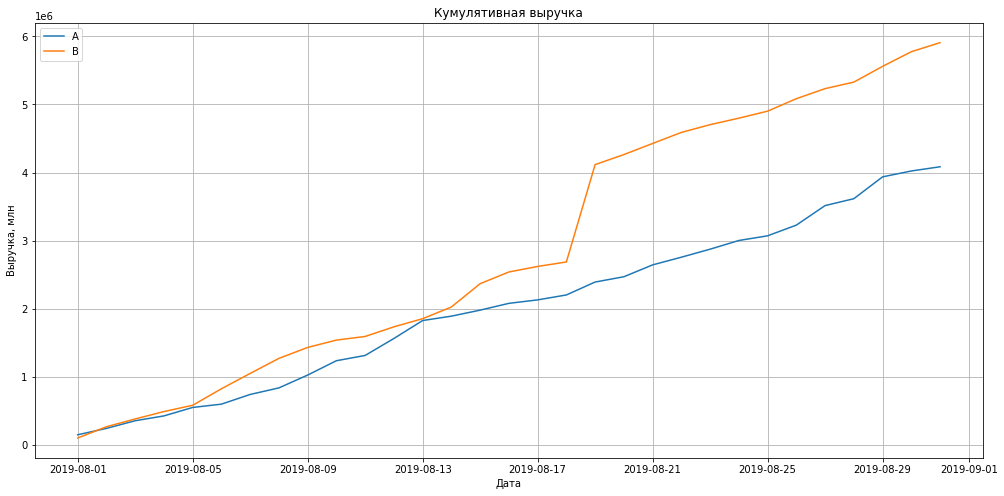

In [27]:
plt.figure(figsize=(17, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.grid()
plt.legend()
plt.show()

**Вывод:** 

Из графика видно, что первые пять дней выручка была приблизительно одинаковая, но после сегмент В стал приносить немного больше выручки. Примерно в середине проведения исследования виден сильный скачок прибыли в сегменте В, вероятнее всего это аномальные заказы, считем что именно они повлияли на такой результат.

#### Построим график кумулятивного среднего чека по группам. 

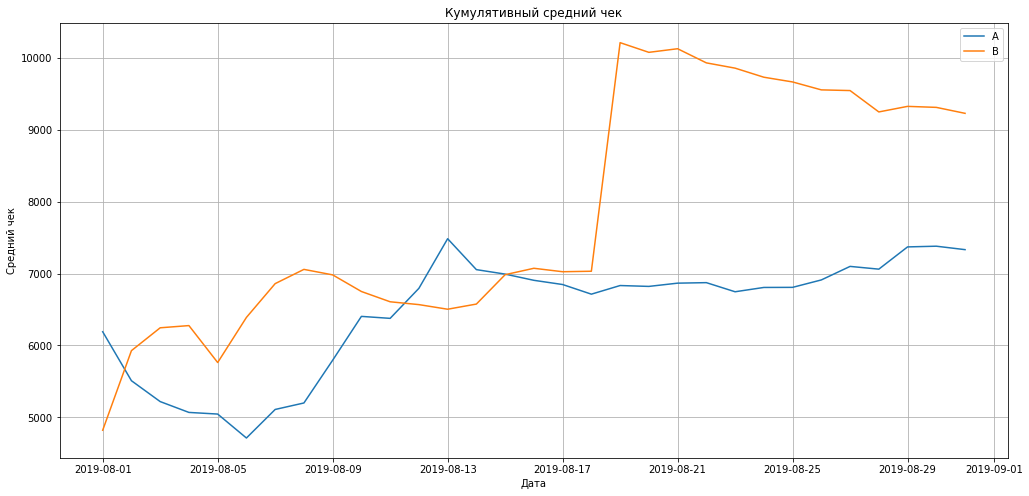

In [28]:
plt.figure(figsize=(17, 8))
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
         label='A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B')
plt.title('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()
plt.show()

Кумулятивный средний чек по группам показывает колебания в начале периода, но затем выравнивается. В середине теста произошел скачек, возможно в данных есть аномалии.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [29]:
# собираем данные в одной таблице
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

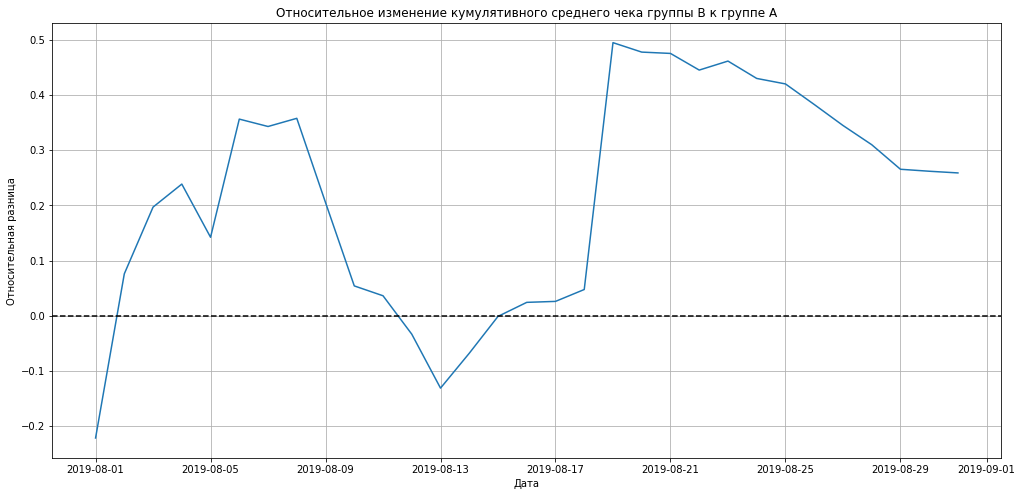

In [30]:
# cтроим график отношения средних чеков
plt.figure(figsize=(17, 8))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB'] / 
          mergedCumulativeRevenue['ordersB']) / 
         (mergedCumulativeRevenue['revenueA'] / 
          mergedCumulativeRevenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница')
plt.grid()
plt.show()

На этом графике хорошо видно резкие изменения, в районе 13 августа. Средний чек В стал резко ниже чека группы А, а потом опять выше. 

Скорее всего это влияние аномальных заказов. Также не будем забывать, что в обоих группах есть одни и те же пользователи, что может отражаться на результатах.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам.

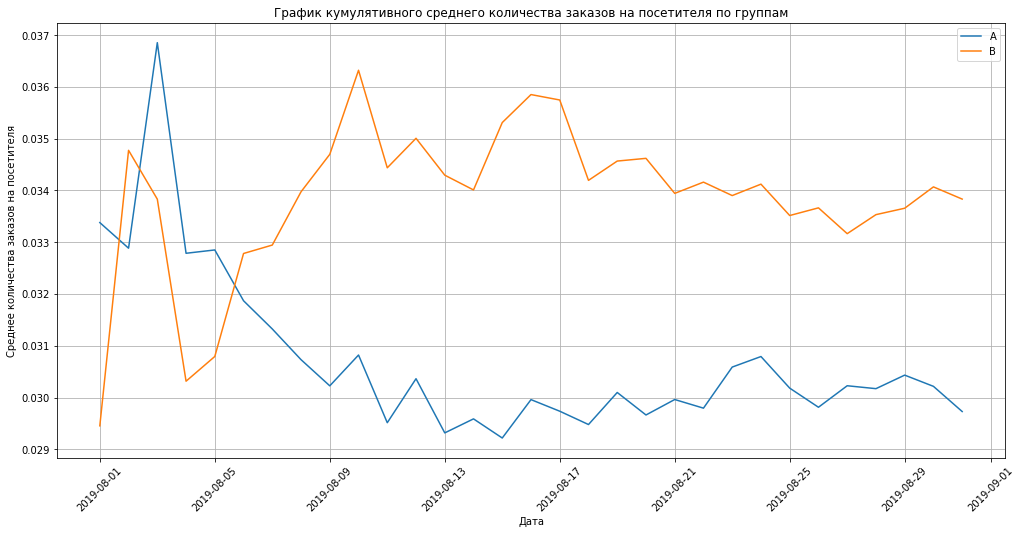

In [31]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(17, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel("Среднее количества заказов на посетителя")
plt.xlabel("Дата")
plt.grid()
plt.show()

Кумулятивное среднее количество заказов на посетителя в группе Б превышает значение аналогичного показателя группы А

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [32]:
# объединяем данные в одну таблицу
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])
)

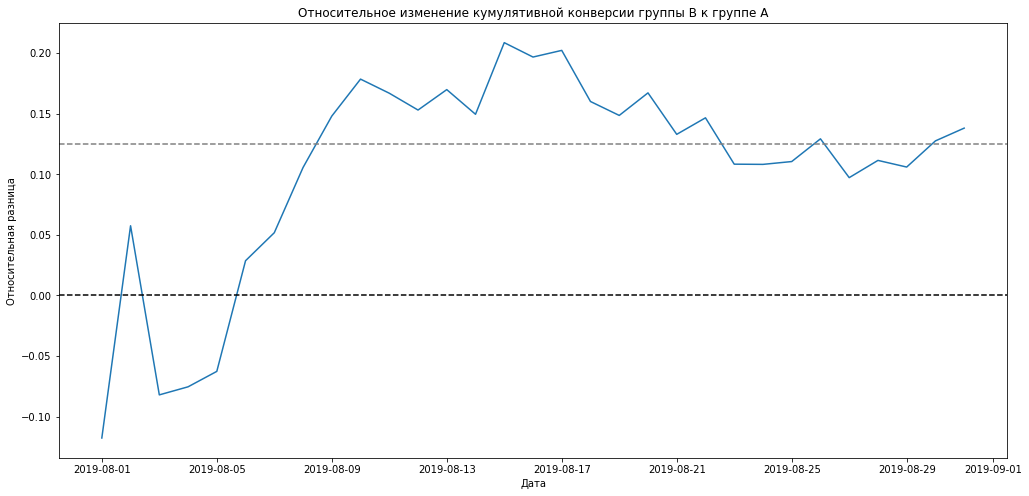

In [33]:
# строим график
plt.figure(figsize=(17, 8))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
#Отметим на графике дополнительную горизонтальную прямую на уровне 0.125 - относительный выигрыш группы В начал стабилизироваться.
plt.axhline(y=0.125, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница')
plt.show()

Примерно после 5 дней теста группа В начала уверенно лидировать по конверсии. 

Она поднималась до прироста почти в 20%, затем немного снизилась и начала колебаться в пределах 10% и 15% прироста относительно группы А.

#### Построим точечный график количества заказов по пользователям. 

In [34]:
# считает количество заказов для каждого пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

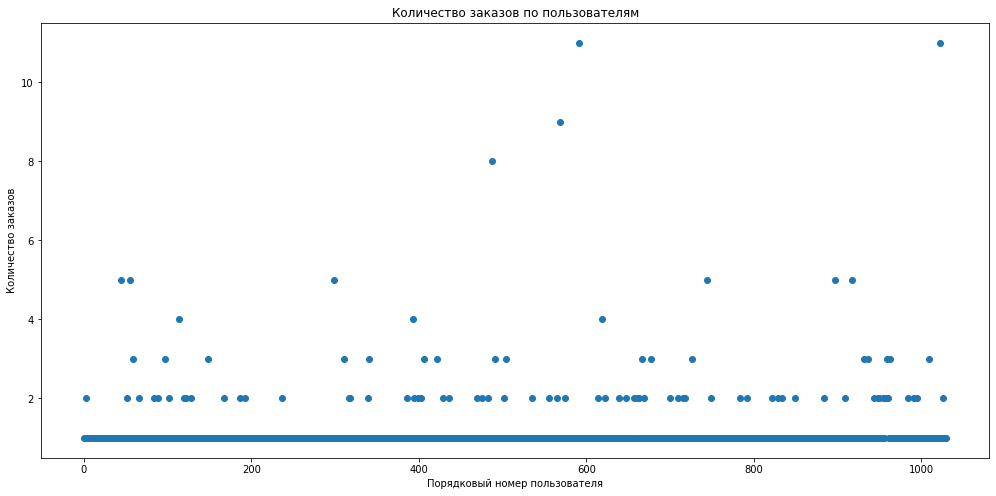

In [35]:
# строим точечный график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(17, 8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')
plt.show()

По графику видно, что пользователей, сделавших больше 2 заказов мало. 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали более двух заказов и не более 1% - больше четырёх. Примем количество заказов равное 2 как границу для фильтрации.

In [37]:
filterOrders = np.percentile(ordersByUsers['orders'], 95)

#### Построим точечный график стоимостей заказов.

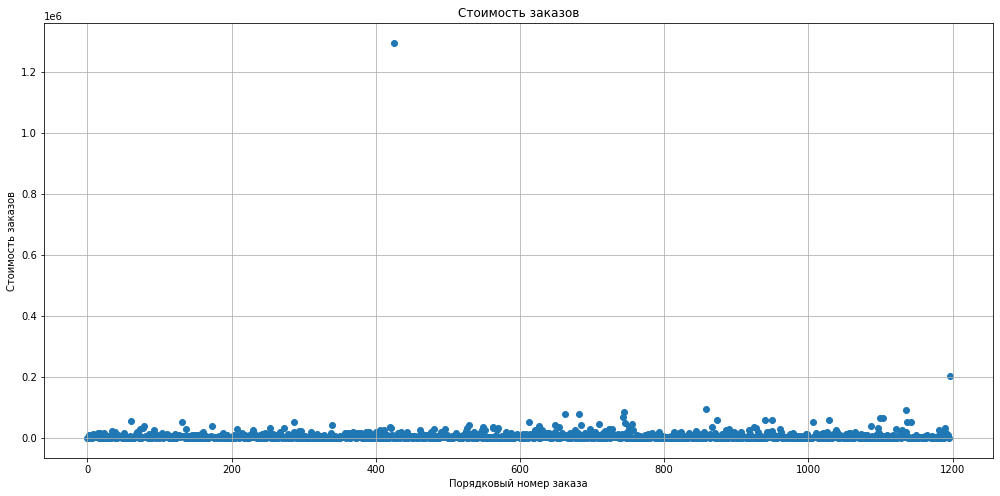

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(17, 8))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

Видим два выброса - заказ стоимостью 1 200 000 рублей и заказ стоимостью больше 200 000 рублей. Остальные заказы не превышают 100 000, видны некоторые выбросы, но установить примерную границу на данном этапе трудно. 

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [39]:
np.percentile(orders['revenue'], [95, 97, 99])

array([28000. , 35485. , 58233.2])

Не более 5% заказов стоят дороже 28 000 рублей и не более 1% - дороже 58 233 рублей. Возьмем за аномальные значения заказы, которые стоят дороже 28 000 рублей.

In [40]:
filterRevenue = np.percentile(orders['revenue'], 95)

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

In [41]:
# создаем таблицы с количество заказов по пользователям
ordersByUsersA = (
    orders.query('group == \'A\'')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders.query('group == \'B\'')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [42]:
# таблицы с количеством ежедневных посещений в группах
visitorsADaily = visitors.query('group == \"A\"')[['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors.query('group == \"B\"')[['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# таблицы с ежедневными количествами заказов, их стоимостями и количество посетителей по датам
ordersADaily = (
    orders.query('group == \"A\"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# те же таблицы, но с кумулятивными значениями
ordersACummulative = cumulativeData.query('group == \"A\"')[['date', 
                                                             'orders', 
                                                             'revenue', 
                                                             'visitors']]
ordersACummulative.columns = ['date', 
                              'ordersCummulativeA', 
                              'revenueCummulativeA', 
                              'visitorsCummulativeA']

ordersBDaily = (
    orders.query('group == \"B\"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = cumulativeData.query('group == \"B\"')[['date', 
                                                             'orders', 
                                                             'revenue', 
                                                             'visitors']]
ordersBCummulative.columns = ['date', 
                              'ordersCummulativeB', 
                              'revenueCummulativeB', 
                              'visitorsCummulativeB']

data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
     .merge(ordersACummulative, left_on='date', right_on='date', how='left')
     .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
     .merge(visitorsADaily, left_on='date', right_on='date', how='left')
     .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   visitorsCummulativeA  ordersCummulativeB  revenueCummulativeB  \
0                   719                  21               101217   
1                  1338                  45               266748   
2                  1845   

In [43]:
# количество заказов пользователей, включая пользователй без заказов
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, 
               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],axis=0)

Проверим статистическую значимость различий конверсий пользователей групп А и групп В. Сформулируем гипотезы:

* H0: Различий в среднем количестве заказов на посетителя между группами нет.
* H1: Различия в среднем количестве заказов на посетителя между группами есть.

Для рассчёта статистической значимости будем использовать критерий Манна-Уитни из-за наличия выбросов в данных.

In [44]:
# применяем критерий Манна-Уитни
print('Значение P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# рассчитываем относительный прирост конверсии группы В относительно А
print('Относительная разница между группами:' "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение P-value: 0.017
Относительная разница между группами:0.138


P-value меньше 0.05 значит нулевую гепотезу отвергаем.

Значение 0.017 как показатель статистически значимого различия между группами А и В. Относительный прирост уровня конверсии относительно группы А - почти 14%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий среднего чека групп А и групп В. Сформулируем гипотезы:

* H0: Различий в среднем чеке между группами нет.
* H1: Различия в среднем чеке между группами есть.

Для рассчёта статистической значимости будем использовать тот же критерий Манна-Уитни.

In [45]:
# применяем критерий Манна-Уитни
print('Значение P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders.query('group == \"A\"')['revenue'], 
                                          orders.query('group == \"B\"')['revenue'])[1]))

# рассчитываем относительные увеличение среднего чека группы В относительно А
print('Относительная разница между группами:', '{0:.3f}'.format(orders.query('group == \"B\"')['revenue'].mean() / 
                       orders.query('group == \"A\"')['revenue'].mean() - 1))

Значение P-value: 0.729
Относительная разница между группами: 0.259


P-value = 0.729 и значительно больше 0.05. 

Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

А наблюдаемое различие в 26% группы Б не является стат. значимым.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [46]:
# определяем аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA.query('orders > @filterOrders')['userId'],
        ordersByUsersB.query('orders > @filterOrders')['userId']
    ],
    axis=0,
)
usersWithExpensiveOrders = orders.query('revenue > @filterRevenue')['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [47]:
# формируем списки таблицы по неаномальным пользователям
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим статистическую значимость для отфильтрованных данных. Оставим те же гипотезы:

* H0: Различий в конверсии между группами нет.
* H1: Различия в конверсии между группами есть.


Будем использовать критерий Манна-Уитни.

In [48]:
# применяем критерий Манна-Уитни
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# рассчитываем относительный прирост конверсии группы В относительно А
print('{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.013
0.173


P-value = 0.013 что по прежнему меньше 0.05. Значит нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем в пользу альтернативной гипотезы.

Статистически значимая разница есть, а относительный прирост конверсии стал 17%. Можно сделать вывод, что сегмент В лучше, чем сегмент А.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим статистическую значимость различия среднего чека для отфильтрованных данных. Оставим те же гипотезы:

* H0: Различий в среднем чеке между группами нет.
* H1: Различия в среднем чеке между группами есть.

Будем использовать критерий Манна-Уитни.

In [49]:
# применяем критерий Манна-Уитни
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'])[1]
    )
)
# рассчитываем относительное увеличение среднего чека группы В относительно А
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1
    )
)

0.738
-0.020


P-value = 0.738 и значительно больше 0.05. Причин отвергать нулевую гипотезу нет.

Как и на сырых данных, тут статистически значимой разницы не обнаружено, но теперь группа В проигрывает относительно среднего чека А на 2%, хотя раньше выигрывала на 25%. Аномальные значения сильно повлияли на результаты анализа средких чеков групп.

#### Примим решение по результатам теста.

После анализа проведённого А/В-теста можно сделать выводы:

Существует статистически значимая разница между конверсиями групп как при подсчёте по "сырым", так и по "очищенным" данным.


Статистически значимой разницы между средними чеками групп нет. Однако при "очищенных данных" средний чек группы В проигрывает группе А относительно на 2%.


График относительного изменения кумулятивной конверсии группы B к группе A показывает, что конверсия группы В стабильно лучше группы А. Возможно это значение ещё колеблется вокруг среднего, но уже точно А не будет лучше.


По графику относительного изменения среднего чека группы В к группе А нельзя сказать ничего конкретного. График искажён аномальными значениями.


Изменения, которые показывались группе В улучшили конверсию пользователей, но на средний чек эти изменения повлияли в меньшей степени (если не брать в счёт аномально дорогие заказы).


Думаю, тест можно остановить и признать успешным. Заметно улучшение в конверсии группы В относительно группы А.